Name: Mihirkumar Dilpbhai Patel

Student ID: T00681063

COMP4980 FINAL PROJECT

In [1]:
#importing all the required dependencies

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import accuracy_score, r2_score, precision_score, recall_score, f1_score


import seaborn as sns

In [2]:
# Uploading the dataset
from google.colab import files
file = files.upload()

Saving heart.csv to heart.csv


In [3]:
# Loading the data into the dataframe
from io import StringIO
df = pd.read_csv(StringIO(file['heart.csv'].decode('latin-1')))

In [4]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


First 5 records and last 5 records of the dataset are shown above.

Getting information about all the attributes. Checking if there are any errors or missing values


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


The result provided above shows the the total number of missing values for each attribute. For our dataset, it is 0 for all.

Using describe() to get the staatistical analysis of the data such as mean, max/min values.

In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Now, we will find the correlation of our dataset and see how all the attributes of the dataset are related to each other.

In [8]:
corr = df.corr()

corr.style.background_gradient(cmap='coolwarm')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.072297,-0.229324
sex,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.084687,-0.026666,0.111729,0.198424,-0.279501
cp,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341,0.434854
trestbps,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276,-0.138772
chol,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.100244,-0.099966
fbs,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,-0.042177,-0.041164
restecg,-0.132696,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504,0.134468
thalach,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.098068,0.422895
exang,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.197201,-0.438029
oldpeak,0.208137,0.084687,-0.174733,0.187434,0.064880,0.010859,-0.050114,-0.349796,0.310844,1.000000,-0.575189,0.221816,0.202672,-0.438441


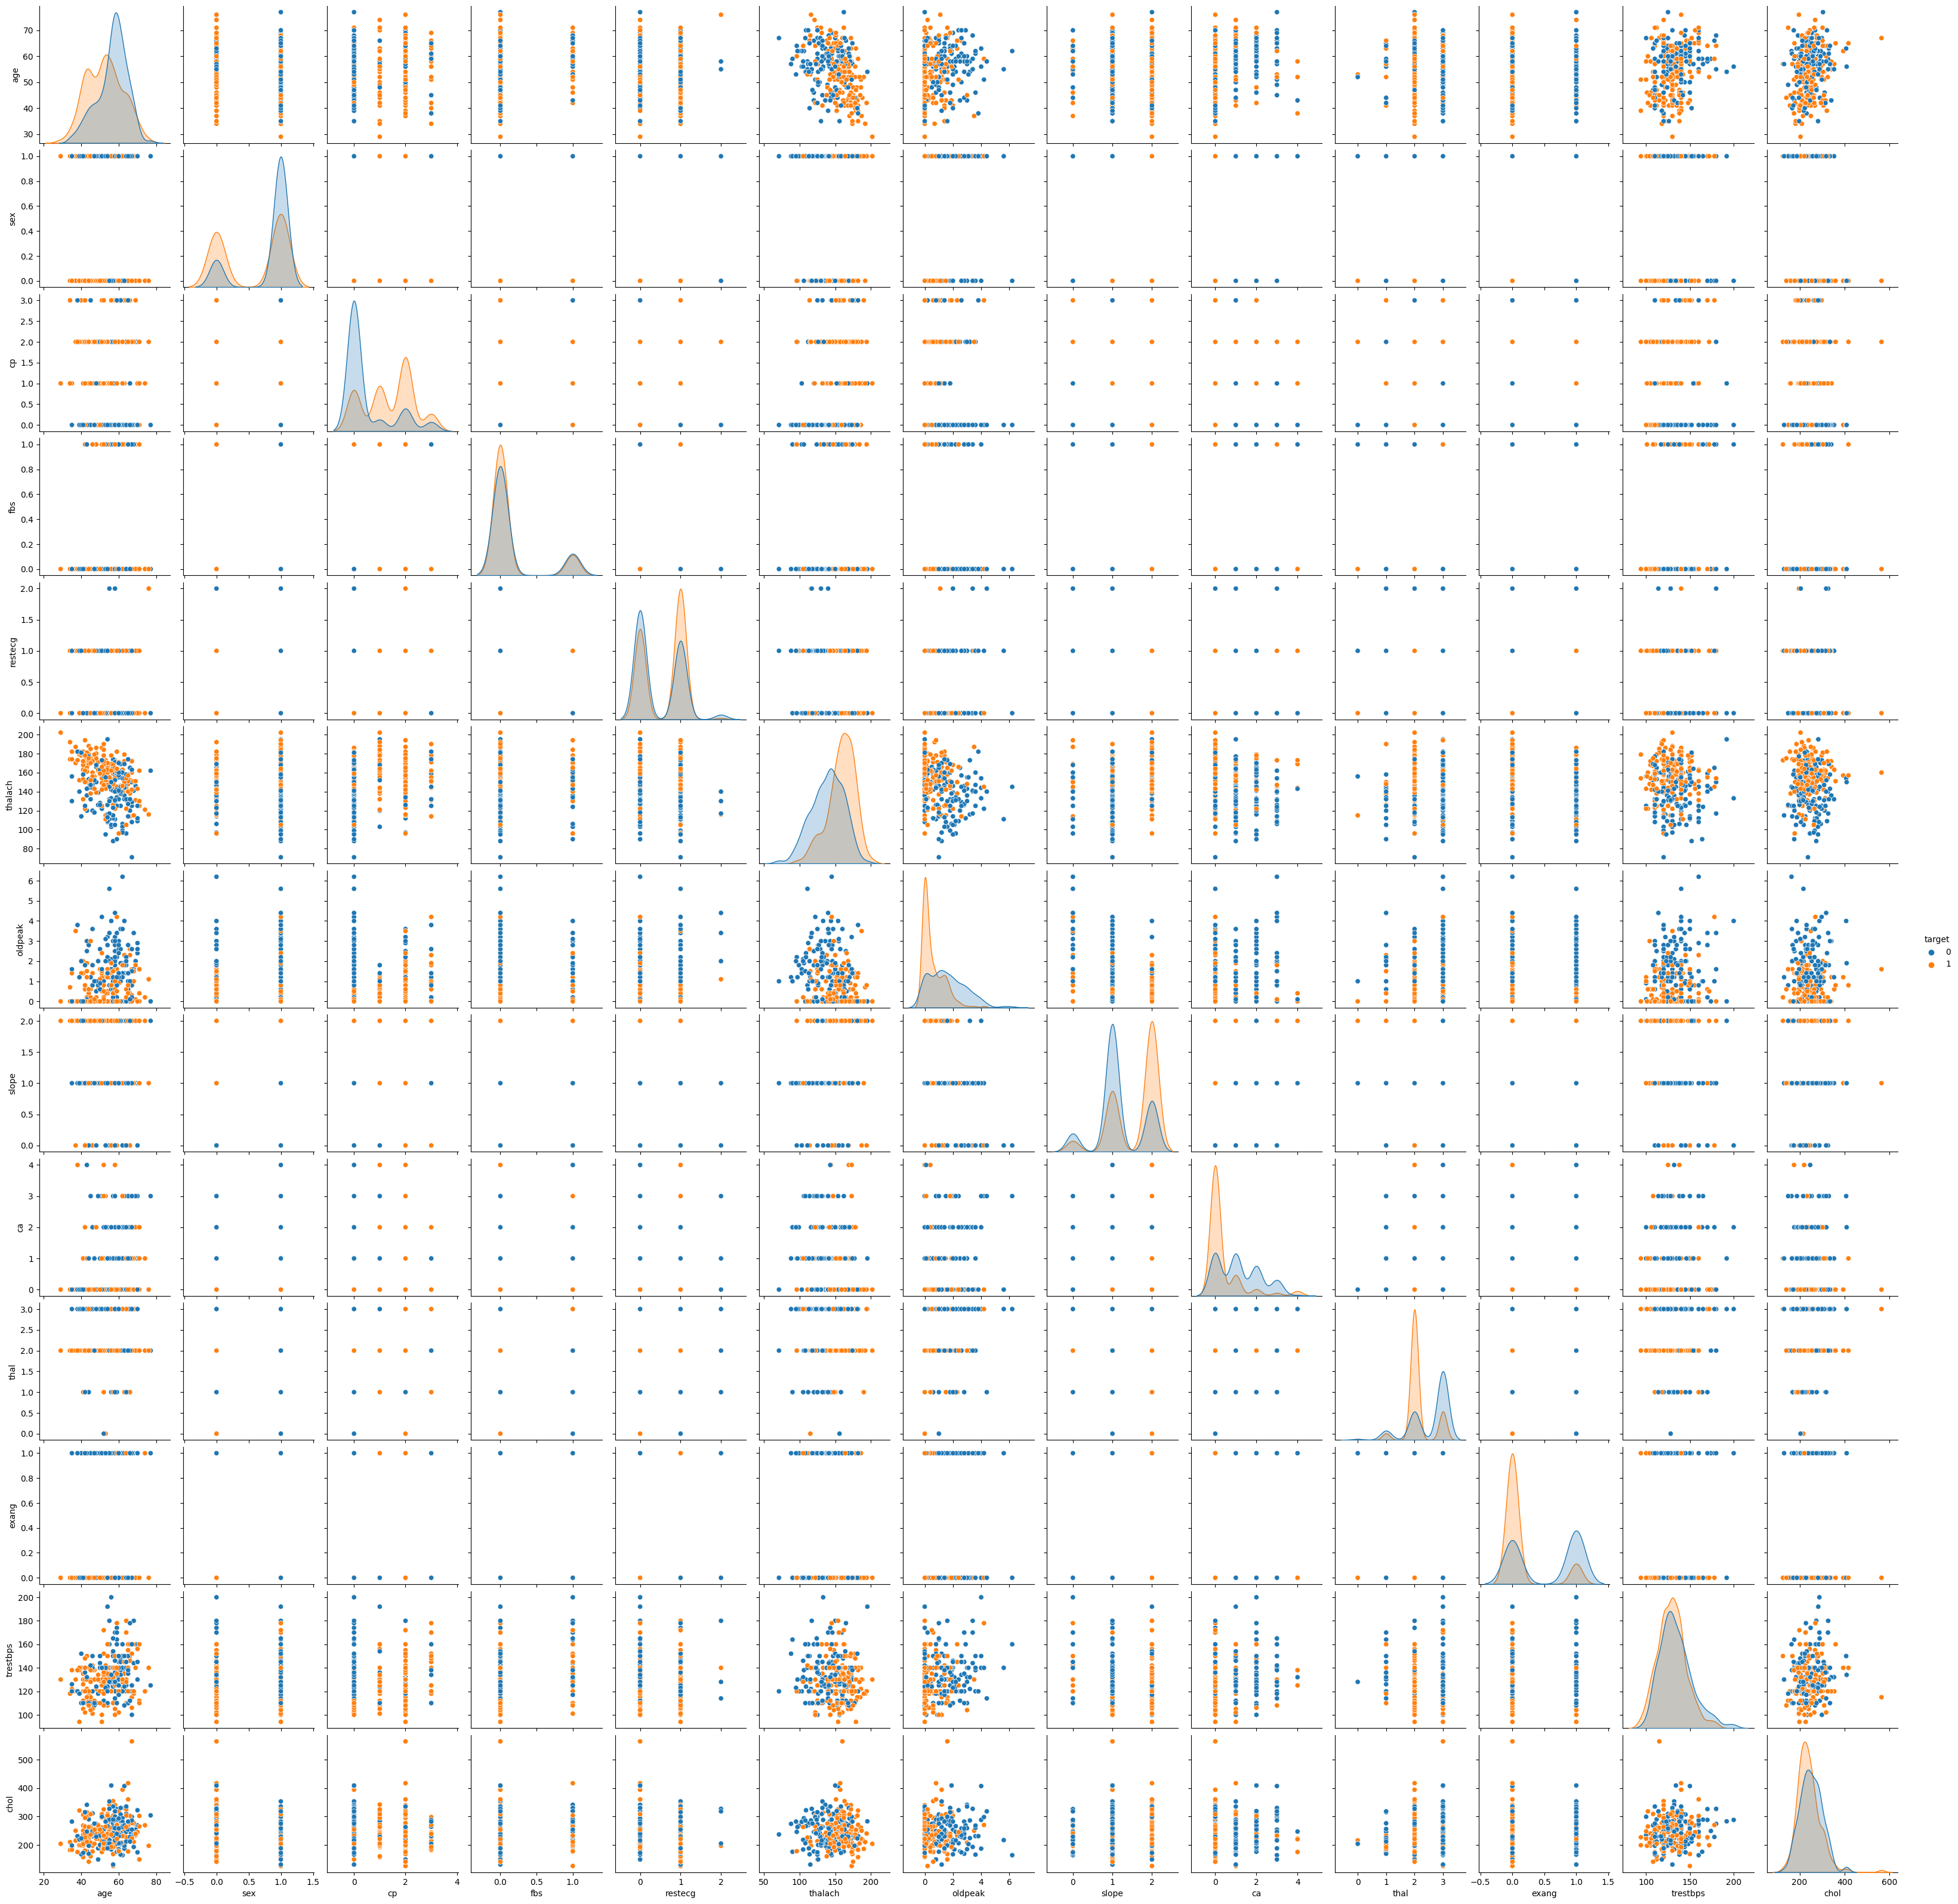

In [9]:
#Using pairplot to check relations between every pair of attributes
sns.pairplot(df, hue='target', vars=['age', 'sex','cp','fbs','restecg','thalach','oldpeak','slope','ca','thal','exang','trestbps', 'chol'])

Distrubution of "target" value. Here, 1 represents presence of the heart disease and 0 represents the absence of the heart disease.

In [7]:
target_counts =df['target'].value_counts()
target_counts

1    526
0    499
Name: target, dtype: int64

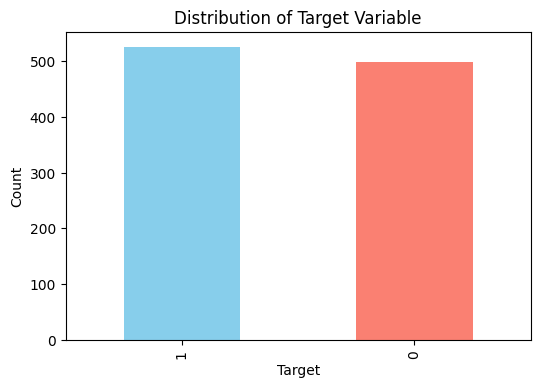

In [10]:
plt.figure(figsize=(6, 4))
target_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribution of Target Variable')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

Here, the distribution of target values are almost even so the data does not need any pre-processing


In [11]:
# Now we split the features and the target to predict if a person has a heart disease or not
X = df.drop(columns = 'target', axis = 1)
y = df['target']

In [12]:
print(X)

      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  
0         2   2     3  
1         0   0     3  
2  

We can see that the data has split successfully because there is no 'target' column above. The columns reduced from 14 to 13.  Now we print the 'target' column.

In [13]:
print(y)

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64


In [14]:
# Splitting the data into Train-Test Set
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2)


Original Dataset

In [16]:
print(X.shape)

(1025, 13)


Training Data on Split

In [15]:
print(X_train.shape)

(820, 13)


Testing data on Split

In [ ]:
print(X_test.shape)

In [17]:
model = LogisticRegression()

# Training the LogisticRegression Model with our training data  to find the corresponding relations between the features and 'target' variable
model.fit(X_train, Y_train)

# To store the predicted values in the model and check the r2 score on testing data
y_pred = model.predict(X_test)
r2_score_result = r2_score(Y_test, y_pred)

print('R2 Score:' , r2_score_result)


R2 Score: 0.4057971014492753


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [18]:
reg = LinearRegression()

# Training the LinearRegression Model with our training data  to find the corresponding relations between the features and 'target' variable
reg.fit(X_train, Y_train)

# To store the predicted values in the model and check the r2 score on testing data
y_pred = reg.predict(X_test)

r2_score_result = r2_score(Y_test, y_pred)

print('R2 Score:' , r2_score_result)





R2 Score: 0.4939952583970647


In [19]:
X = df.drop(columns = 'target', axis = 1)
y = df['target']

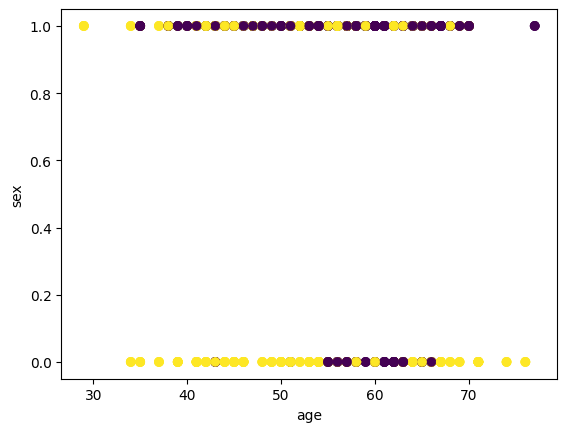

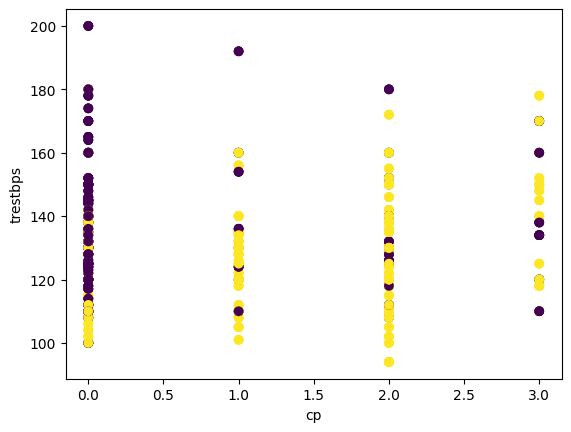

In [20]:
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y)
plt.xlabel(X.columns[0])
plt.ylabel(X.columns[1])
plt.show()

plt.scatter(X.iloc[:, 2], X.iloc[:, 3], c=y)
plt.xlabel(X.columns[2])
plt.ylabel(X.columns[3])
plt.show()



In [21]:
from sklearn.decomposition import PCA
pca = PCA(0.96)
pca.fit(X)
X_trans = pca.transform(X)

In [22]:
pca.components_

array([[ 4.09115150e-02, -1.77412809e-03, -1.65597467e-03,
         4.96346089e-02,  9.97823634e-01,  2.12385526e-04,
        -1.53341511e-03, -1.39735608e-02,  6.50894427e-04,
         1.62509580e-03, -2.38081356e-04,  1.57538144e-03,
         1.22454199e-03],
       [ 1.75058097e-01,  9.24596907e-04, -1.30219075e-02,
         8.49904671e-02, -2.52092638e-02,  4.11769598e-04,
        -1.25827022e-03, -9.80162440e-01,  7.58039285e-03,
         1.82082531e-02, -1.06173858e-02,  9.82977372e-03,
         2.61406710e-03],
       [ 1.26539207e-01, -1.61073305e-03,  5.31854035e-03,
         9.84405656e-01, -5.26462888e-02,  3.72439127e-03,
        -3.06369568e-03,  1.09497854e-01,  2.77595181e-05,
         9.36131045e-03, -2.52450637e-03,  4.72600196e-03,
         1.19976372e-03]])

In [23]:
pca.explained_variance_ratio_

array([0.74530931, 0.15199174, 0.08492751])

In [24]:
# Alternative to check how many components explain 96% variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

num_components_96_var = np.argmax(cumulative_variance >= 0.96) + 1
print(f"Number of components explaining 96% variance: {num_components_96_var}")

Number of components explaining 96% variance: 3


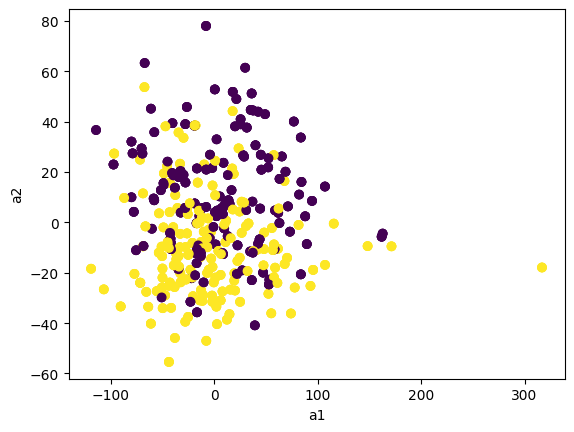

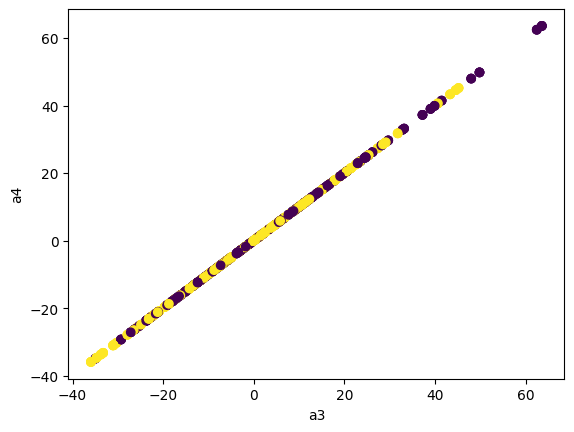

In [25]:
plt.scatter(X_trans[:,0],X_trans[:,1],c=y)
plt.xlabel('a1')
plt.ylabel('a2')
plt.show()
plt.scatter(X_trans[:,2],X_trans[:,2],c=y)
plt.xlabel('a3')
plt.ylabel('a4')
plt.show()

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [27]:
pca = PCA(n_components=1)
pca.fit(X_train)
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

In [28]:
# PCA exploration using KNNClassifier

from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=7, p=4)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

from sklearn.metrics import accuracy_score
print(accuracy_score(y_pred,y_test))

0.7024390243902439


In [29]:
# PCA exploration using Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
est = LinearRegression()
est.fit(X_train, y_train)
y_pred = est.predict(X_test)

print(r2_score(y_test, y_pred))

-0.0022690325595300376


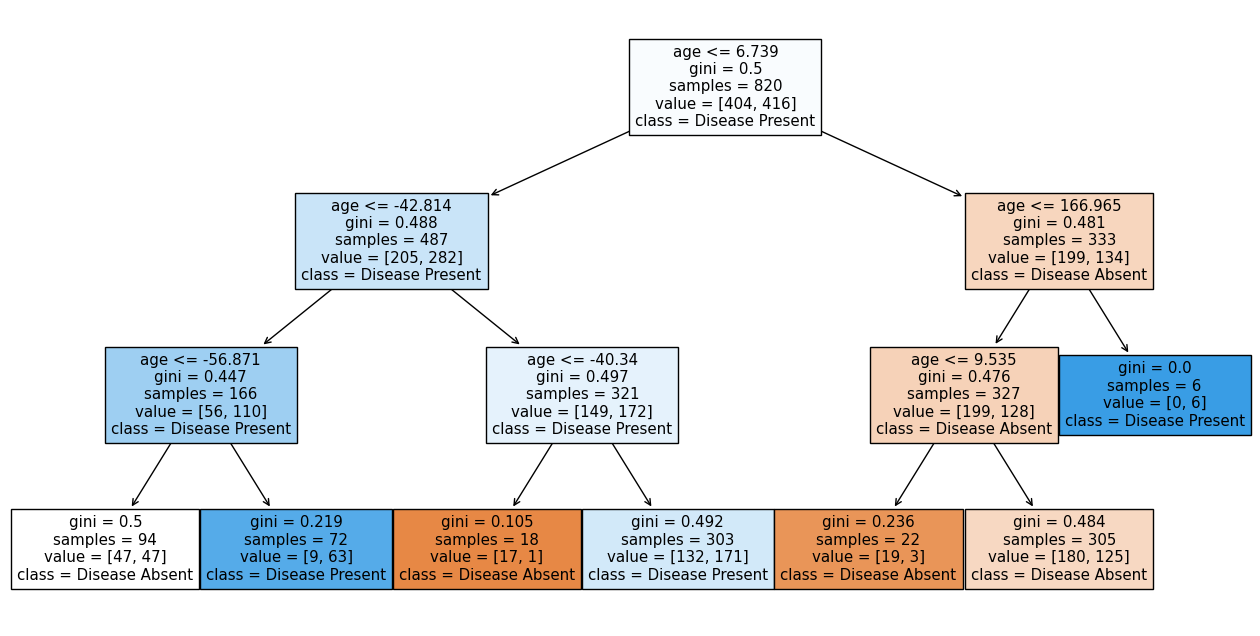

In [30]:
# Data Exploration Using DecisionTree Classifier with depth of 3
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train, y_train)

plt.figure(figsize=(16, 8))
plot_tree(dt, feature_names=X.columns, class_names=['Disease Absent', 'Disease Present'], filled=True)
plt.show()

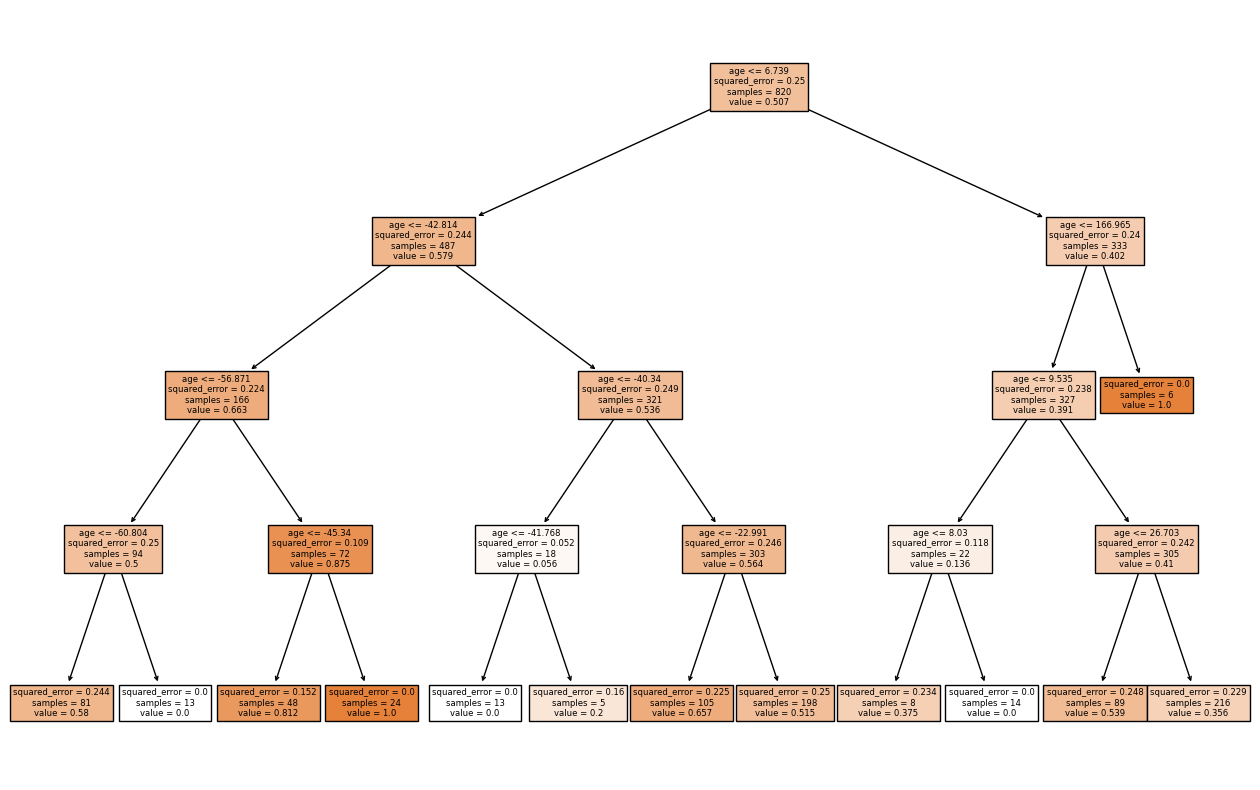

In [31]:
# Data Exploration Using DecisionTree Regressor with depth of 4
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree

dt = DecisionTreeRegressor(max_depth=4)
dt.fit(X_train, y_train)

plt.figure(figsize=(16, 10))
plot_tree(dt, feature_names=X.columns, class_names=['Disease Absent', 'Disease Present'], filled=True)
plt.show()

In [41]:
# importing necessary libraries
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score


Hypothesis: Predict Heart Disease based on all the attributes contributing towards the heart disease

In [33]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=200)

# Feature scaling with StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [34]:
# Defining all the ensemble methods with default parameters
random_forest = RandomForestRegressor(random_state=200)
extra_trees = ExtraTreesRegressor(random_state=42)
ada_boost = AdaBoostRegressor(random_state=42)
gradient_boost = GradientBoostingRegressor(random_state=42)
mlp = MLPRegressor(max_iter=1000, random_state=42)

In [35]:

# Creating dictionary of all the methods
methods = {
    'Random Forest': random_forest,
    'Extra Trees': extra_trees,
    'AdaBoost': ada_boost,
    'Gradient Boost': gradient_boost,
    'MLP': mlp
}

In [39]:

results = {}

In [40]:
# Train models using cross-validation and grid search
for method_name, method in methods.items():
    print(f"Training...")
    # Defining hyperparameters grid for GridSearchCV
    param_grid = {}
    if method_name == 'Random Forest':
        param_grid = {'n_estimators': [20, 100, 130], 'max_depth': [None, 5, 10]}
    elif method_name == 'Extra Trees':
        param_grid = {'n_estimators': [20, 100, 130], 'max_depth': [None, 5, 10]}
    elif method_name == 'AdaBoost':
        param_grid = {'n_estimators': [20, 100, 130], 'learning_rate': [0.01, 0.1, 1.0]}
    elif method_name == 'Gradient Boost':
        param_grid = {'n_estimators': [20, 100, 130], 'learning_rate': [0.01, 0.1, 1.0]}
    elif method_name == 'MLP':
        param_grid = {'hidden_layer_sizes': [(20,), (100,), (50, 50), (100, 100)], 'alpha': [0.0001, 0.001, 0.01]}

    # Performing GridSearchCV with cross-validation
    grid_search = GridSearchCV(method, param_grid, cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X_train_scaled, y_train)

    # Choosing the best method from the grid search
    best_method = grid_search.best_estimator_

    # Evaluating the best method using test data
    y_pred = best_method.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results[method_name] = {
        'best_method': best_method,
        'best_params': grid_search.best_params_,
        'MSE': mse,
        'R2 Score': r2
    }

    print(f"{method_name} - Mean Squared Error: {mse:.4f}, R2 Score: {r2:.4f}\n")



Training...
Random Forest - Mean Squared Error: 0.0490, R2 Score: 0.8037

Training...
Extra Trees - Mean Squared Error: 0.0240, R2 Score: 0.9040

Training...
AdaBoost - Mean Squared Error: 0.1274, R2 Score: 0.4897

Training...
Gradient Boost - Mean Squared Error: 0.0456, R2 Score: 0.8172

Training...
MLP - Mean Squared Error: 0.0184, R2 Score: 0.9265



This was the best result obtained on increasing the max_depth, n_estimators and more hidden layers with very high values .

Random Forest - Mean Squared Error: 0.0488, R2 Score: 0.8045

Extra Trees - Mean Squared Error: 0.0267, R2 Score: 0.8929

AdaBoost - Mean Squared Error: 0.1291, R2 Score: 0.4829

Gradient Boost - Mean Squared Error: 0.0455, R2 Score: 0.8179

MLP - Mean Squared Error: 0.0241, R2 Score: 0.9035




This was the result obtained on decreasing the max_depth, n_estimators and hidden layers at very low values.

Random Forest: MSE: 0.0497, R2 Score: 0.8009

Extra Trees: MSE: 0.0261, R2 Score: 0.8954

AdaBoost: MSE: 0.1126, R2 Score: 0.5490

Gradient Boost: MSE: 0.0789, R2 Score: 0.6840

MLP: MSE: 0.0962, R2 Score: 0.6149
